Full summary and report can be found in https://www.dropbox.com/s/1ghkg19an5xqpj6/EDA_Automobiles.docx?dl=0

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
sns.set()

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import missingno

auto_df = pd.read_csv("automobile.txt")
auto_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [79]:
auto_df.drop_duplicates(keep='first')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,88.6,four,130,111,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,88.6,four,130,111,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,94.5,six,152,154,19,26,16500
3,audi,gas,std,four,sedan,fwd,99.8,four,109,102,24,30,13950
4,audi,gas,std,four,sedan,4wd,99.4,five,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,109.1,four,141,114,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,109.1,four,141,160,19,25,19045
202,volvo,gas,std,four,sedan,rwd,109.1,six,173,134,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,109.1,six,145,106,26,27,22470


Remove columns

In [14]:
auto_df.drop(['symboling','normalized-losses', 'engine-location', 'fuel-system', 'bore', 'stroke', 'compression-ratio'], axis=1, inplace=True)
auto_df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,115,5500,18,22,17450


In [16]:
auto_df.drop(['length', 'width', 'height', 'curb-weight', 'engine-type', 'peak-rpm'], axis=1, inplace=True)
auto_df.head(10)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,88.6,four,130,111,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,88.6,four,130,111,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,94.5,six,152,154,19,26,16500
3,audi,gas,std,four,sedan,fwd,99.8,four,109,102,24,30,13950
4,audi,gas,std,four,sedan,4wd,99.4,five,136,115,18,22,17450
5,audi,gas,std,two,sedan,fwd,99.8,five,136,110,19,25,15250
6,audi,gas,std,four,sedan,fwd,105.8,five,136,110,19,25,17710
7,audi,gas,std,four,wagon,fwd,105.8,five,136,110,19,25,18920
8,audi,gas,turbo,four,sedan,fwd,105.8,five,131,140,17,20,23875
9,audi,gas,turbo,two,hatchback,4wd,99.5,five,131,160,16,22,?


Check for NaN values

In [17]:
missing_values_count = auto_df.isnull().sum()
missing_values_count[:]

make                0
fuel-type           0
aspiration          0
num-of-doors        0
body-style          0
drive-wheels        0
wheel-base          0
num-of-cylinders    0
engine-size         0
horsepower          0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

Get data for stories

In [23]:
auto_df.sort_values('engine-size', ascending=False).head()


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
49,jaguar,gas,std,two,sedan,rwd,102.0,twelve,326,262,13,17,36000
73,mercedes-benz,gas,std,four,sedan,rwd,120.9,eight,308,184,14,16,40960
74,mercedes-benz,gas,std,two,hardtop,rwd,112.0,eight,304,184,14,16,45400
48,jaguar,gas,std,four,sedan,rwd,113.0,six,258,176,15,19,35550
47,jaguar,gas,std,four,sedan,rwd,113.0,six,258,176,15,19,32250


Top 5 biggest engines

In [28]:
auto_df['price'] = auto_df['price'].replace(['?'], -1)
auto_df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,88.6,four,130,111,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,88.6,four,130,111,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,94.5,six,152,154,19,26,16500
3,audi,gas,std,four,sedan,fwd,99.8,four,109,102,24,30,13950
4,audi,gas,std,four,sedan,4wd,99.4,five,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,109.1,four,141,114,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,109.1,four,141,160,19,25,19045
202,volvo,gas,std,four,sedan,rwd,109.1,six,173,134,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,109.1,six,145,106,26,27,22470


clean price data

In [29]:
auto_df['horsepower'] = auto_df['horsepower'].replace(['?'], -1)
auto_df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,88.6,four,130,111,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,88.6,four,130,111,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,94.5,six,152,154,19,26,16500
3,audi,gas,std,four,sedan,fwd,99.8,four,109,102,24,30,13950
4,audi,gas,std,four,sedan,4wd,99.4,five,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,109.1,four,141,114,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,109.1,four,141,160,19,25,19045
202,volvo,gas,std,four,sedan,rwd,109.1,six,173,134,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,109.1,six,145,106,26,27,22470


clean horsepower data

In [32]:
auto_df['price'] = auto_df['price'].astype(np.int64)
auto_df['horsepower'] = auto_df['horsepower'].astype(np.int64)


In [33]:
auto_df.sort_values('price', ascending=False).head()


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
74,mercedes-benz,gas,std,two,hardtop,rwd,112.0,eight,304,184,14,16,45400
16,bmw,gas,std,two,sedan,rwd,103.5,six,209,182,16,22,41315
73,mercedes-benz,gas,std,four,sedan,rwd,120.9,eight,308,184,14,16,40960
128,porsche,gas,std,two,convertible,rwd,89.5,six,194,207,17,25,37028
17,bmw,gas,std,four,sedan,rwd,110.0,six,209,182,15,20,36880


Top 5 most expensive cars

In [34]:
auto_df.sort_values('horsepower', ascending=False).head()


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
129,porsche,gas,std,two,hatchback,rwd,98.4,eight,203,288,17,28,-1
49,jaguar,gas,std,two,sedan,rwd,102.0,twelve,326,262,13,17,36000
128,porsche,gas,std,two,convertible,rwd,89.5,six,194,207,17,25,37028
127,porsche,gas,std,two,hardtop,rwd,89.5,six,194,207,17,25,34028
126,porsche,gas,std,two,hardtop,rwd,89.5,six,194,207,17,25,32528


Top 5 highest horsepower

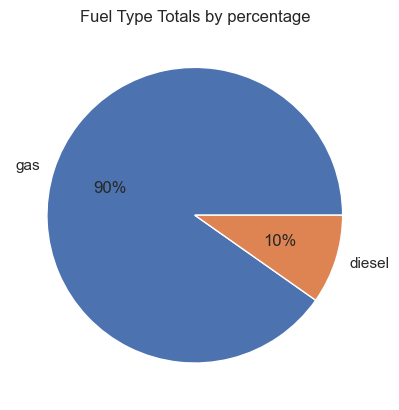

In [45]:
data = auto_df['fuel-type'].value_counts()
plt.pie(data, labels=data.index, autopct='%1.0f%%')
plt.title("Fuel Type Totals by percentage")
plt.show()

Fuel type totals

Text(0.5, 1.0, 'Car Price by Make')

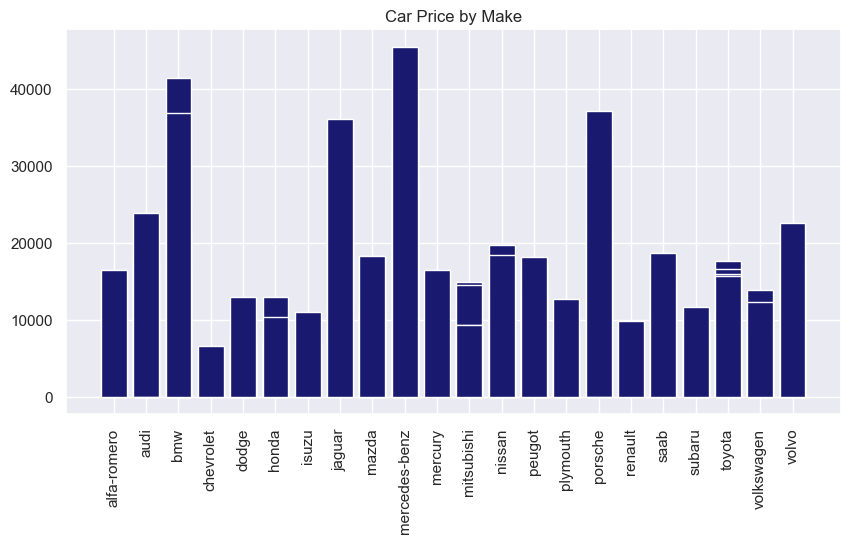

In [46]:

plt.figure(figsize=(10,5)) 
plt.bar(x=auto_df['make'], 
        height=auto_df['price'], 
        color='midnightblue') 
plt.xticks(rotation=90)
plt.title('Car Price by Make')

<AxesSubplot: title={'center': 'City vs Highway MPG by Make'}, xlabel='make'>

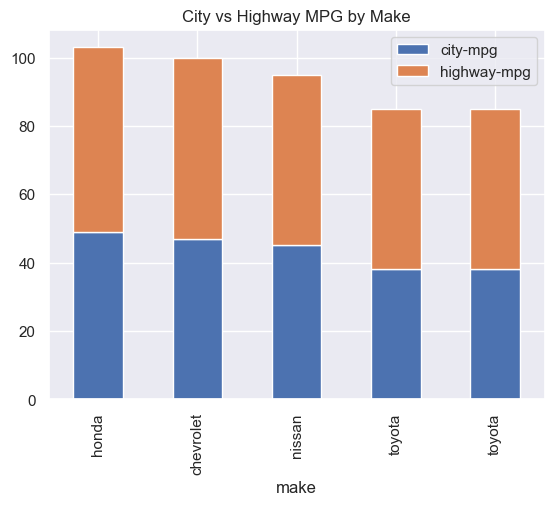

In [62]:
temp_df = pd.DataFrame(auto_df, columns=['city-mpg', 'highway-mpg','make']).sort_values('highway-mpg', ascending=False).head()
#temp_df.sort_values('highway-mpg', ascending=False).head()

temp_df.plot.bar(x='make', stacked=True, title='City vs Highway MPG by Make')


Top 5 highest MPG

In [64]:
makes = auto_df['make'].value_counts()
makes

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

Count of makes

In [ ]:
plt.figure(figsize=(12,8)) 
plt.pie(makes, labels=makes.index, autopct='%1.0f%%')
plt.title("Percentage of Car Data by Make")
plt.show()

<AxesSubplot: title={'center': 'Horsepower by Engine Size'}, xlabel='engine-size', ylabel='horsepower'>

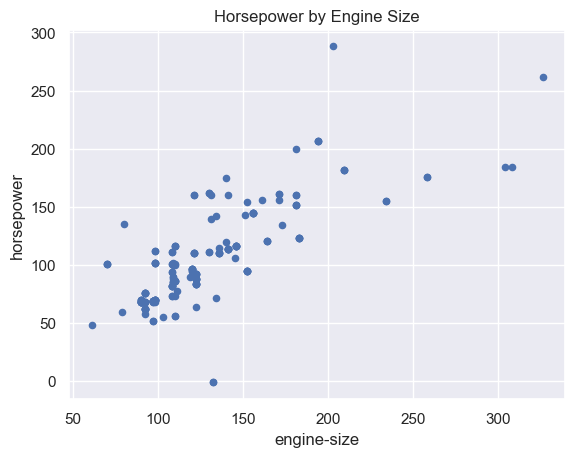

In [83]:
auto_df.plot.scatter(x='engine-size', y='horsepower', title='Horsepower by Engine Size')

<AxesSubplot: title={'center': 'Highway MPG by Engine Size'}, xlabel='engine-size', ylabel='highway-mpg'>

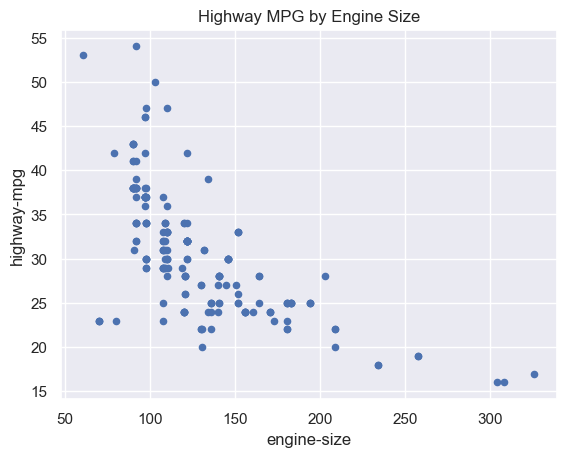

In [82]:
auto_df.plot.scatter(x='engine-size', y='highway-mpg', title='Highway MPG by Engine Size')

Compare MPG and horsepower by engine size